# Cellular Automata

`CellPyLib` is a library for working with 1d and 2d Cellular Automata  with periodic boundary conditions. The cellular automata produced by this library match the corresponding cellular automata available at [atlas.wolfram.com](http://atlas.wolfram.com/).

In [1]:
import cellpylib as cpl

## 1d CA

initialize a CA with 200 cells (a random initialization is also available) 


In [2]:
cellular_automaton = cpl.init_simple(200)

evolve the CA for 100 time steps, using Rule 30 as defined in NKS

In [3]:
cellular_automaton = cpl.evolve(cellular_automaton, 
                                timesteps=100,
                                apply_rule=lambda n, c, t: cpl.nks_rule(n, 30))

plot the resulting CA evolution

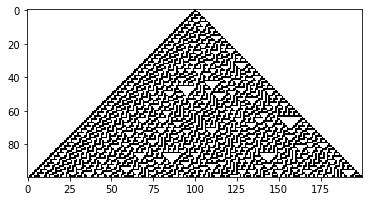

In [4]:
cpl.plot(cellular_automaton)

### Varying the Neighbourhood Size

The size of the cell neighbourhood can be varied by setting the parameter $r$ when calling the `evolve` function. The value of $r$ represents the number of cells to the left and to the right of the cell under consideration.

**Example** [M. Mitchell et al.] cellular automaton that solves the density classification problem: 

if the initial random binary vector contains more than 50% of 1s, then a cellular automaton that solves this problem will give rise to a vector that contains only 1s after a fixed number of time steps, and likewise for the case of 0s. 

A very effective cellular automaton that solves this problem most of the time (rule 6667021275756174439087127638698866559) was found using a Genetic Algorithm. We evolve the CA, setting $r$ to 3, for a neighbourhood size of 7

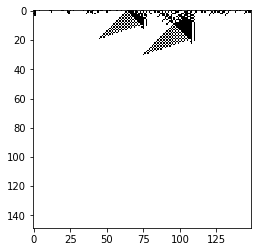

In [5]:
cellular_automaton = cpl.init_random(149)
rule_number = 6667021275756174439087127638698866559
cellular_automaton = cpl.evolve(cellular_automaton, 
                                timesteps=149,
                                apply_rule=lambda n, c, t: cpl.binary_rule(n, rule_number), 
                                r=3)
cpl.plot(cellular_automaton)

### Varying the Number of Colors

The number of states, or colors, that a cell can adopt is given by $k$. For example, a binary cellular automaton, in which a cell can assume only values of 0 and 1, has $k = 2$. `CellPyLib` supports any value of $k$. A built-in function, `totalistic_rule`, is an implementation of the [Totalistic](http://mathworld.wolfram.com/TotalisticCellularAutomaton.html) cellular automaton rule, as described in [Wolfram's NKS](https://writings.stephenwolfram.com/2017/05/a-new-kind-of-science-a-15-year-view/). The code snippet below illustrates using this rule. A value of $k=3$ is used, but any value between (and including) 2 and 36 is currently supported. The rule number is given in base 10 but is interpreted as the rule in base $k$ (thus rule 777 corresponds to '1001210' when $k = 3$).

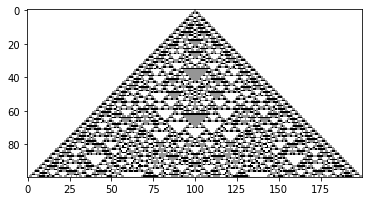

In [6]:
cellular_automaton = cpl.init_simple(200)
cellular_automaton = cpl.evolve(cellular_automaton, 
                                timesteps=100,
                                apply_rule=lambda n, c, t: cpl.totalistic_rule(n, k=3, rule=777))
cpl.plot(cellular_automaton)

### Rule Tables

One way to specify cellular automata rules is with rule tables. Rule tables are enumerations of all possible neighbourhood states together with their cell state mappings. For any given neighbourhood state, a rule table provides the associated cell state value. `CellPyLib` provides a built-in function for creating random rule tables.

### Average Cell Entropy

Average cell entropy can reveal something about the presence of information within cellular automata dynamics. The built-in function `average_cell_entropy` provides the average Shannon entropy per single cell in a given cellular automaton.

### Average Mutual Information

The degree to which a cell state is correlated to its state in the next time step can be described using mutual information. Ideal levels of correlation are required for effective processing of information. The built-in function `average_mutual_information` provides the average mutual information between a cell and itself in the next time step (the temporal distance can be adjusted). 

**Example** [C. G. Langton] describes the lambda parameter, and the transition from order to criticality to chaos in cellular automata while varying the lambda parameter. In the following snippet we demonstrates its usage:

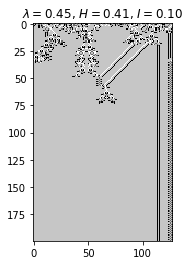

In [7]:
rule_table, actual_lambda, quiescent_state = cpl.random_rule_table(lambda_val=0.45, 
                                                                   k=4, 
                                                                   r=2,
                                                                   strong_quiescence=True, 
                                                                   isotropic=True)
cellular_automaton = cpl.init_random(128, k=4)

# use the built-in table_rule to use the generated rule table
cellular_automaton = cpl.evolve(cellular_automaton, 
                                timesteps=200,
                                apply_rule=lambda n, c, t: cpl.table_rule(n, rule_table), 
                                r=2)
avg_cell_entropy = cpl.average_cell_entropy(cellular_automaton)
avg_mutual_information = cpl.average_mutual_information(cellular_automaton)
cpl.plot(cellular_automaton,title=r'$\lambda=0.45$, $H={:.2f}$, $I={:.2f}$'.format(avg_cell_entropy,avg_mutual_information))

## 2d CA

`CellPyLib` supports 2-dimensional cellular automata with periodic boundary conditions. The number of states, $k$, can be any whole number. The neighbourhood radius, $r$, can also be any whole number, and both [Moore](https://en.wikipedia.org/wiki/Moore_neighborhood) and [von Neumann](https://en.wikipedia.org/wiki/Von_Neumann_neighborhood) neighbourhood types are supported. 

The following snippet demonstrates creating a 60x60 2D totalistic cellular automaton. It evolves the cellular automaton for 30 time steps, applying totalistic rule 126 to each cell with a Moore neighbourhood:

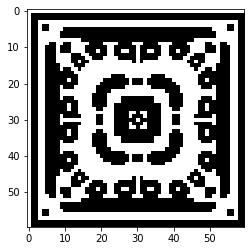

In [8]:
cellular_automaton = cpl.init_simple2d(60, 60)
cellular_automaton = cpl.evolve2d(cellular_automaton, 
                                  timesteps=30, 
                                  neighbourhood='Moore',
                                  apply_rule=lambda n, c, t: cpl.totalistic_rule(n, k=2, rule=126))
cpl.plot2d(cellular_automaton)

**Example** [Conway's Game of Life]

There are a number of built-in plotting functions for 2D cellular automata. For example, `plot2d_animate` will animate the evolution of the cellular automaton. This is illustrated in the following snippet, which demonstrates the built-in Game of Life rule:

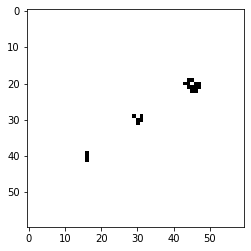

In [9]:
# Glider
cellular_automaton = cpl.init_simple2d(60, 60)
cellular_automaton[:, [28,29,30,30], [30,31,29,31]] = 1

# Blinker
cellular_automaton[:, [40,40,40], [15,16,17]] = 1

# Light Weight Space Ship (LWSS)
cellular_automaton[:, [18,18,19,20,21,21,21,21,20], [45,48,44,44,44,45,46,47,48]] = 1

# evolve the cellular automaton for 60 time steps
cellular_automaton = cpl.evolve2d(cellular_automaton, timesteps=60, neighbourhood='Moore',
                                  apply_rule=cpl.game_of_life_rule)

cpl.plot2d_animate(cellular_automaton)

## References: 

- Melanie Mitchell, James P. Crutchfield, and Rajarshi Das, "Evolving Cellular Automata with Genetic Algorithms: A Review of Recent Work", In Proceedings of the First International Conference on Evolutionary Computation and Its Applications (EvCA'96), Russian Academy of Sciences (1996).
- Langton, C. G. (1990). Computation at the edge of chaos: phase transitions and emergent computation. Physica D: Nonlinear Phenomena, 42(1-3), 12-37.
- Conway, J. (1970). The game of life. Scientific American, 223(4), 4.
- Antunes, Luis M. (2019, March 10). CellPyLib: A Python Library for working with Cellular Automata. Zenodo. http://doi.org/10.5281/zenodo.3893115